In [3]:
!pip install pywavelets

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.3 MB 1.0 MB/s eta 0:00:04
   ------- -------------------------------- 0.8/4.3 MB 987.4 kB/s eta 0:00:04
   --------- ------------------------------ 1.0/4.3 MB 1.0 MB/s eta 0:00:04
   ------------ --------------------------- 1.3/4.3 MB 1.0 MB/s eta 0:00:03
   -------------- ------------------------- 1.6/4.3 MB 1.1 MB/s eta 0:00:03
   -------------- ------------------------- 1.6/4.3 MB 1.1 MB/s eta 0:00:03
   ----------------- ---------------------- 1.8/4.3 MB 996.7 kB/s eta 0:00:03
   ------------------- -------------------- 2.1/4.3 MB 1.0 MB/s eta 0:00:03
   ---------------------- ----------------- 2.4/4.3 MB 994.4 kB/s eta 0:00:02
   ---------------------- --------

In [22]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import yfinance as yf

In [12]:
# Choose the wavelet and maximum decomposition level
wavelet = 'db1'
max_level = 4

# Initialize a list to store the approximation coefficients
approximations = []
details = []

# Perform the decomposition level by level
for level in range(1, max_level + 1):
    # Decompose signal at the current level
    cA = pywt.downcoef('a', df["Price"], wavelet, level=level)
    cD = pywt.downcoef("d", df["Price"], wavelet, level=level)
    approximations.append(cA)
    details.append(cD)

# Print the approximation coefficients at each level
for i, coeff in enumerate(approximations, 1):
    print(f"Approximation Coefficients at Level {i}: {coeff}")
    print(f"Detail Coefficients at Level {i}: {coeff}")

Approximation Coefficients at Level 1: [ 0.90704379  1.81909323  1.42481181  1.6429506   1.50063399  1.76429085
  1.12540899  0.57136903  0.18757224 -0.98083083 -1.85534734 -1.34421657
 -1.07935609 -1.1775902   0.35546483  0.01785544 -0.6220227   0.82409242
  2.10792652  1.1591009   0.45929801  1.13314683  0.25770022 -0.12466255
 -1.15880636 -1.16656002 -1.89962511 -1.26538234 -1.15508415 -1.30971809
 -0.83958856 -0.8136057   0.55026879  0.66082934  1.04225532  1.70259286
  1.19470013  0.7599628  -0.15977158 -0.30141933 -0.83446127 -1.53006705
 -0.18018838 -1.02692055 -1.16699215 -0.46572963  0.191037    0.71210372
  1.48144457  1.40706731]
Detail Coefficients at Level 1: [ 0.90704379  1.81909323  1.42481181  1.6429506   1.50063399  1.76429085
  1.12540899  0.57136903  0.18757224 -0.98083083 -1.85534734 -1.34421657
 -1.07935609 -1.1775902   0.35546483  0.01785544 -0.6220227   0.82409242
  2.10792652  1.1591009   0.45929801  1.13314683  0.25770022 -0.12466255
 -1.15880636 -1.16656002 -1

In [21]:
prices

Date
2023-01-02    1.070973
2023-01-03    1.067771
2023-01-04    1.054685
2023-01-05    1.060637
2023-01-06    1.052222
                ...   
2023-12-25    1.102657
2023-12-26    1.102026
2023-12-27    1.104301
2023-12-28    1.110864
2023-12-29    1.106819
Name: Close, Length: 260, dtype: float64

[*********************100%%**********************]  1 of 1 completed
C:\Users\frede\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


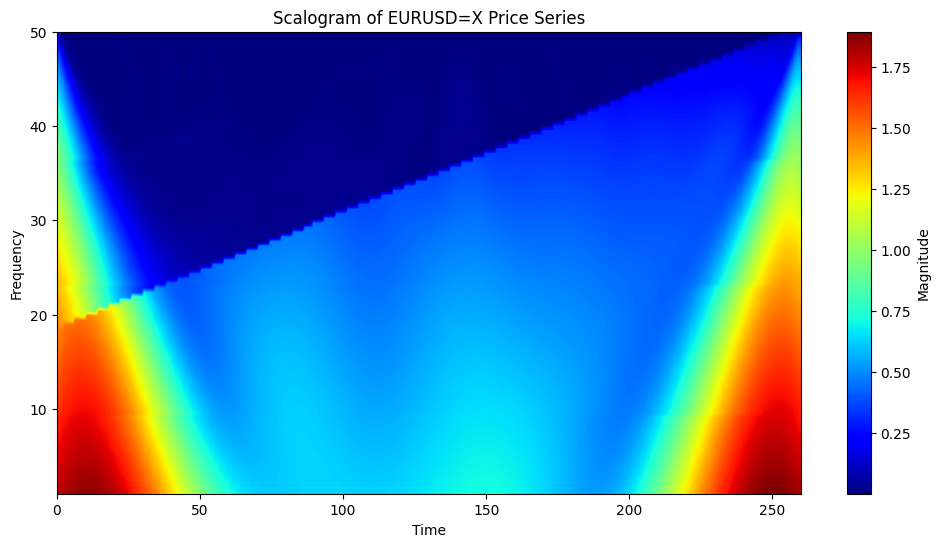

In [24]:
# Download financial data (e.g., EUR/USD or any other stock/forex pair)
ticker = 'EURUSD=X'  # Example ticker for EUR/USD on Yahoo Finance
data = yf.download(ticker, start='2023-01-01', end='2024-01-01', interval='1d')
prices = data['Close']

# Prepare the time series
time_series = prices.values
time = np.arange(len(time_series))  # Create a time vector

# Parameters for CWT
sampling_rate = 1  # Daily data
frequency_range = np.linspace(1, 50, 100)  # Define frequency range for CWT

# Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor'  # Complex Morlet wavelet
coefficients, frequencies = pywt.cwt(time_series, frequency_range, wavelet, sampling_rate)

# Plot the scalogram
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(time_series), frequency_range.min(), frequency_range.max()],
           aspect='auto', interpolation='bilinear', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title(f'Scalogram of {ticker} Price Series')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

One could use the typical statistical features like mean and standard deviation to build normal models. However, I decide on using a different approach.
Volatility indicators at highest levels to estimate short-term volatility

Frequency Domain features
Compute the enery (sum of squared coefficients)
Compute entropy

In [91]:
df = pd.read_csv("./data/minute_algo_eur_usd.txt", sep=", ", header=None)
df.rename(columns={0: 'Datetime', 1: 'Midprice'}, inplace=True)
df["Midprice"] = df["Midprice"].str.replace(",", ".")
df["Midprice"] = df["Midprice"].astype("float")
df["Datetime"] = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S%f')
df.set_index("Datetime", inplace=True)
df.head()

C:\Users\frede\AppData\Local\Temp\ipykernel_9452\2828216623.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./data/minute_algo_eur_usd.txt", sep=", ", header=None)


,Midprice
Datetime,
2024-01-01 22:06:00,1.10430
2024-01-01 22:07:00,1.10430
2024-01-01 22:09:00,1.10422
2024-01-01 22:10:00,1.10422
2024-01-01 22:11:00,1.10421


In [111]:
# Slice dataframe by day since we dont want to trade over the end of the day
DF_list = [group[1] for group in  df.groupby([df.index.year,df.index.month,df.index.day])]
len(DF_list)

143

In [115]:
(DF_list[100].reset_index()).loc[:240]

,Datetime,Midprice
0,2024-04-26 00:00:00,1.07271
1,2024-04-26 00:01:00,1.07261
2,2024-04-26 00:02:00,1.07264
3,2024-04-26 00:03:00,1.07255
4,2024-04-26 00:04:00,1.07247
...,...,...
236,2024-04-26 03:56:00,1.07217
237,2024-04-26 03:57:00,1.07217
238,2024-04-26 03:58:00,1.07225
239,2024-04-26 03:59:00,1.07233


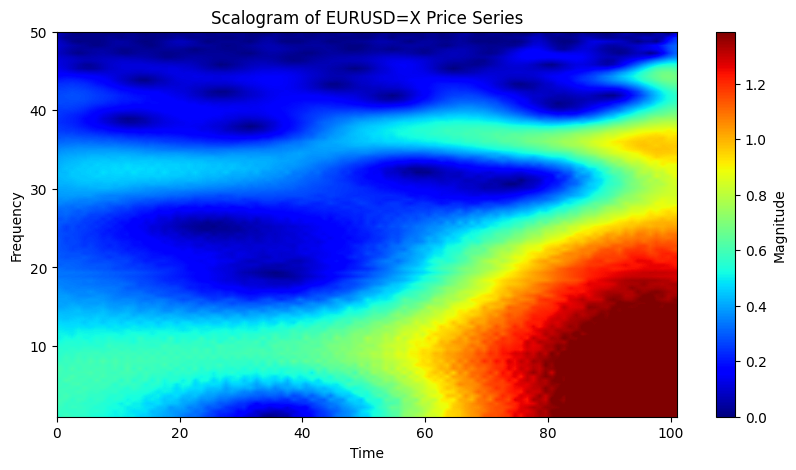

In [161]:
# Prepare the time series
time_series = (DF_list[28].reset_index()).loc[240:340].Midprice
time_series_normalized = (time_series - time_series.mean()) / time_series.std()

# Parameters for CWT
sampling_rate = 1  # Minutely data
frequency_range = np.linspace(1, 50, 100)  # Define frequency range for CWT

# Perform Continuous Wavelet Transform (CWT)
wavelet = "cmor1.5-1.0"  # Complex Morlet wavelet
coefficients, frequencies = pywt.cwt(time_series_normalized, frequency_range, wavelet, sampling_rate)

# Plot the scalogram
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coefficients), extent=[0, len(time_series), frequency_range.min(), frequency_range.max()],
           aspect='auto', interpolation='bilinear', cmap='jet', vmin=0, vmax=np.percentile(np.abs(coefficients), 95))
plt.colorbar(label='Magnitude')
plt.title(f'Scalogram of {ticker} Price Series')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

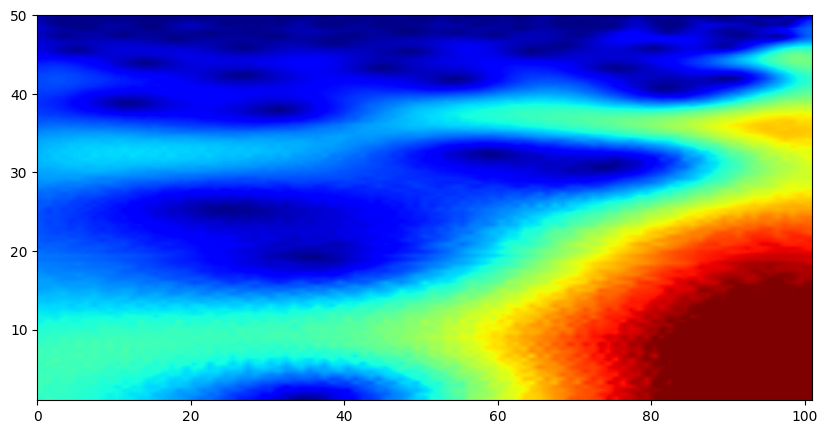

In [162]:
# Prepare the time series
time_series = (DF_list[28].reset_index()).loc[240:340].Midprice
time_series_normalized = (time_series - time_series.mean()) / time_series.std()

# Parameters for CWT
sampling_rate = 1  # Minutely data
frequency_range = np.linspace(1, 50, 100)  # Define frequency range for CWT

# Perform Continuous Wavelet Transform (CWT)
wavelet = "cmor1.5-1.0"  # Complex Morlet wavelet
coefficients, frequencies = pywt.cwt(time_series_normalized, frequency_range, wavelet, sampling_rate)

# Plot the scalogram
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coefficients), extent=[0, len(time_series), frequency_range.min(), frequency_range.max()],
           aspect='auto', interpolation='bilinear', cmap='jet', vmin=0, vmax=np.percentile(np.abs(coefficients), 95))
plt.show()